In [1]:
% cd drive/MyDrive/Colab\ Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [2]:
import pickle

import tensorflow as tf
from tensorflow.keras import layers, models

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [3]:
X_train = pickle.load(open("X_train.sav", 'rb'))
X_val = pickle.load(open("X_val.sav", 'rb'))

In [4]:
y_train = pickle.load(open("y_train.sav", 'rb'))
y_val = pickle.load(open("y_val.sav", 'rb'))

In [5]:
X_train.shape

(4592, 158208)

In [6]:
'''
model = models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=158208, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
'''

model = models.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=158208, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2, input_dim=158208, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer_fn = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


144/144 [==============================] - 6s 20ms/step - loss: 0.6938 - accuracy: 0.5207 - val_loss: 0.6926 - val_accuracy: 0.5174
Epoch 2/100
144/144 [==============================] - 2s 15ms/step - loss: 0.6937 - accuracy: 0.5057 - val_loss: 0.6925 - val_accuracy: 0.5226
Epoch 3/100
144/144 [==============================] - 2s 16ms/step - loss: 0.6942 - accuracy: 0.5024 - val_loss: 0.6925 - val_accuracy: 0.5157
Epoch 4/100
144/144 [==============================] - 2s 16ms/step - loss: 0.6931 - accuracy: 0.5207 - val_loss: 0.6924 - val_accuracy: 0.5113
Epoch 5/100
144/144 [==============================] - 2s 16ms/step - loss: 0.6930 - accuracy: 0.5115 - val_loss: 0.6923 - val_accuracy: 0.5183
Epoch 6/100
144/144 [==============================] - 2s 16ms/step - loss: 0.6928 - accuracy: 0.5244 - val_loss: 0.6923 - val_accuracy: 0.5218
Epoch 7/100
144/144 [==============================] - 2s 15ms/step - loss: 0.6931 - accuracy: 0.5216 - val_loss: 0.6922 - val_accuracy: 0.5296
Epoc

In [8]:
y_pred = model.predict(X_val)

In [9]:
y_pred = (y_pred > 0.5).astype('int64')
y_pred = y_pred.reshape(len(y_pred))

In [10]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       571
           1       0.65      0.58      0.61       577

    accuracy                           0.63      1148
   macro avg       0.63      0.63      0.63      1148
weighted avg       0.63      0.63      0.63      1148



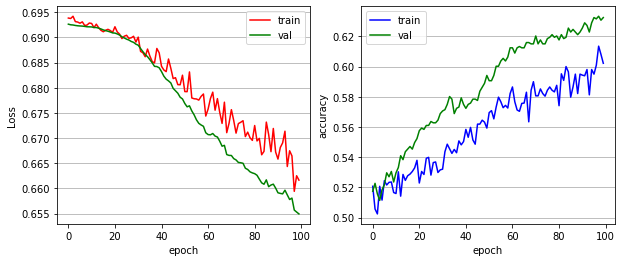

In [11]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
# plt.savefig("cifar10_training_val_no_dropout")

In [12]:
model = []
y_pred = []